# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- tqdm: https://github.com/tqdm/tqdm#installation
- matplotlib: https://matplotlib.org/stable/users/installing/index.html
- ipywidgets and ipykernel if necessary
- Starter Code was tested on Python 3.11.5

In [1]:
import random
import numpy as np
import tqdm.notebook as tqdm
import matplotlib.pyplot as plt
import ipywidgets as widgets
from tqdm import tqdm


# 1: Complete the Implementation of the Four Rooms environment 

- The FourRooms is implemented as a python class. We explain the attributes and methods as follows
    - **init** function: Define all the attributes of the Four Rooms environment. For example, the state space, the action space, the start state, the goal state and so on.
    - **reset** function: Resets the agent to the start state (0, 0)
    - **step** function: Takes the current state and one action, returns the next state and a reward
   
- Please complete the implementation in the step function.

In [2]:
# FOUR ROOM ENVIRONMENT
class FourRooms(object):
    def __init__(self):
        # define the four room as a 2-D array for easy state space reference and visualization
        # 0 represents an empty cell; 1 represents a wall cell
        self.four_room_space = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])
        
        # find the positions for all empty cells
        # not that: the origin for a 2-D numpy array is located at top-left while the origin for the FourRooms is at
        # the bottom-left. The following codes performs the re-projection.
        empty_cells = np.where(self.four_room_space == 0.0)
        self.state_space = [[col, 10 - row] for row, col in zip(empty_cells[0], empty_cells[1])]

        # define the action space
        self.action_space = {'LEFT': np.array([-1, 0]),
                             'RIGHT': np.array([1, 0]),
                             'DOWN': np.array([0, -1]),
                             'UP': np.array([0, 1])}
        
        # define the start state
        self.start_state = [0, 0]
        
        # define the goal state
        self.goal_state = [10, 10]
        

    def reset(self):
        """
        Reset the agent's state to the start state [0, 0]
        Return both the start state and reward
        """
        state = self.start_state  # reset the agent to [0, 0]
        reward = 0  # reward is 0
        return state, reward
        

    def step(self, state, act):
        """
        Args: 
            state: a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act: a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args: 
            next_state: a list variable containing x, y integer coordinates (i.e., [1, 1])
            reward: an integer. it can be either 0 or 1.
        """
        
        # CODE HERE: implement the stochastic dynamics as described in Q1. 
        # Please note, we provide you with the deterministic transition function "take_action" below.
        # Therefore, you only have to implement the logics of the stochasticity.

        if state == self.goal_state:
            return self.reset()
        
        # to get random number for stochasticity
        random_val = random.random()
        if random_val < 0.8:
            next_state = self.take_action(state, act)
        elif random_val < 0.9:
        # Map each action to its first perpendicular direction (clockwise)
            perpendicular_1 = {
                'UP': 'RIGHT',
                'RIGHT': 'DOWN',
                'DOWN': 'LEFT',
                'LEFT': 'UP'
            }
            next_state = self.take_action(state, perpendicular_1[act])
        else:
            perpendicular_2 = {
            'UP': 'LEFT',
            'LEFT': 'DOWN',
            'DOWN': 'RIGHT',
            'RIGHT': 'UP'
            }
            next_state = self.take_action(state, perpendicular_2[act])
        
        if next_state == self.goal_state:
            reward = 1
        else:
            reward = 0


        # CODE HERE: compute the reward based on the resulting state        

        # return the current state, reward
        return next_state, reward
        

    """ DO NOT CHANGE BELOW """
    def take_action(self, state, act):
        """
        Input args: 
            state (list): a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act (string): a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args: 
            next_state (list): a list variable containing x, y integer coordinates (i.e., [1, 1])
        """
        state = np.array(state)
        next_state = state + self.action_space[act]
        return next_state.tolist() if next_state.tolist() in self.state_space else state.tolist()

In [3]:
"""Here is the plot function you can use to generate the figure. DO NOT CHANGE"""
# PLOT FUNCTION
def plot_func(res_list):
    # set the figure size
    plt.figure(figsize=(8, 6))
    
    # plot each trial
    for re in res_list:
        plt.plot(list(range(len(res_list[0]))), re, linestyle="--", linewidth=1, alpha=0.7)

    # plot mean reward
    mean_reward = np.array(res_list).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list[0]))), mean_reward, linestyle="-", linewidth=2, color="k")

    # plot the figure
    plt.ylabel("Cumulative reward")
    plt.xlabel("Time step")
    plt.show()

# 2 Implement the manual policy

Use this to check your whether your implementation of the step function is correct.

In [4]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)

    # create the environment
    env = FourRooms()
    state, reward = env.reset()  # always call reset() before interaction
    
    # manual time step (YOU CAN CHANGE THIS TO ANY TIME STEP YOU WANT)
    time_step = 50 #modified this for shorter time steps


    # create a loop
    for t in range(time_step):
        
        # CODE HERE: implement your manual agent/policy function that takes in the action from the standard input
        action = None

        while True:
            #get input from user
            inp = input().upper()

            if inp in env.action_space:
                action = inp
                break
            else:
                print("Invalid action! Please try again.")
        
        # CODE HERE: implement the code to interact with the Four Rooms environment above.
        # it should takes in the current state and action and returns the next_state and a reward
        # Hint: use the step function that you implement.
        next_state, reward = env.step(state, action)
        
        """DO NOT CHANGE BELOW"""
        # print interaction
        print(f"Step = {t}, state = {state}, action = {action}, next state = {next_state}, reward = {reward}")
        
        # reset if the agent reaches the goal
        if reward == 1:
            print("Reset the agent to the start state!")
            state, reward = env.reset()
        else:
            state = next_state

Step = 0, state = [0, 0], action = UP, next state = [0, 0], reward = 0
Step = 1, state = [0, 0], action = UP, next state = [0, 1], reward = 0
Step = 2, state = [0, 1], action = UP, next state = [0, 2], reward = 0
Step = 3, state = [0, 2], action = UP, next state = [0, 2], reward = 0
Step = 4, state = [0, 2], action = UP, next state = [0, 2], reward = 0
Step = 5, state = [0, 2], action = UP, next state = [0, 3], reward = 0
Step = 6, state = [0, 3], action = UP, next state = [0, 4], reward = 0
Step = 7, state = [0, 4], action = UP, next state = [0, 4], reward = 0
Step = 8, state = [0, 4], action = RIGHT, next state = [1, 4], reward = 0
Step = 9, state = [1, 4], action = UP, next state = [1, 5], reward = 0
Step = 10, state = [1, 5], action = UP, next state = [1, 6], reward = 0
Step = 11, state = [1, 6], action = UP, next state = [1, 7], reward = 0
Step = 12, state = [1, 7], action = UP, next state = [1, 8], reward = 0
Step = 13, state = [1, 8], action = RIGHT, next state = [2, 8], reward 

# 3 Implement a random policy

We provide the scaffolding code for running and plotting. Please implement a random policy

**Please note: you should read the code carefully before implementing to make sure the variable names are aligned.**

## Written Answer for Q3
- Question: How do you think this compares with your manual policy? (You do not have to run your manual policy for 104 steps!) What are some reasons for the difference in performance?

- Answer: The Random Policy is not as good as the manual policy. The manual policy is better because user can choose to move right and up to reach the goal since the user is aware of the environment but random policy is not aware of the environment and it can move in any direction thus the random policy often moves in the wrong direction.


Run trial: 100%|██████████| 10/10 [00:00<00:00, 24.83it/s]


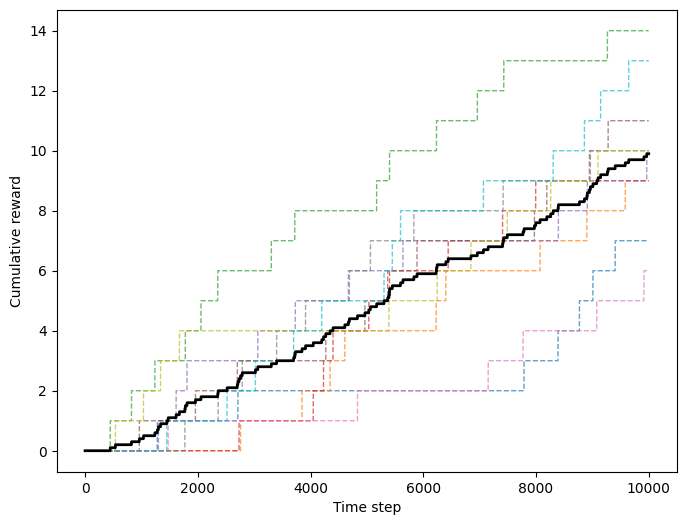

In [9]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_num = 10   
    # length of each trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list = []
    
    # run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            
            # CODE HERE: please implement a random policy to obtain an action.
            # it should return a random action from ["UP", "DOWN", "LEFT", "RIGHT"]

            act_types = ["UP", "DOWN", "LEFT", "RIGHT"]

            action = random.choice(act_types)


                       
            # CODE HERE: please implement the code to get the next state and reward
            # it should takes in the current state and action
            # it should returns the next_state and reward
            next_state, reward = env.step(state, action)
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list)

# 4 Implement better & worse policies against the Random Policy

## Written Answer for Q4

- Question: Describe the strategy each policy uses, and why that leads to generally worse/better performance.

- Answer: For the worse policy since we know the environment we can move the agent away from the goal by mostly moving left or down because agent will be doing the opposite actions that would reach it to the goal. For the better policy we can move the agent to the goal by mostly moving right or up because agent will be doing the actions that would reach it to the goal since we know the environment the best way to reach the goal is to move right or up. 

In [15]:
class WorstPolicy:
    def __init__(self):
        self.action = ["UP", "DOWN", "RIGHT", "LEFT"]
    
    def get_action(self, state):
        '''
        Get action from the policy worst for the agent moves away from the goal
        '''
        prob = random.random()
        if prob <= 0.4:  
            return self.action[1]  # DOWN
        elif prob <= 0.8:  
            return self.action[3]  # LEFT
        elif prob <= 0.9:  
            return self.action[0]  # UP
        else: 
            return self.action[2]  # RIGHT 

In [16]:
class BestPolicy:
    def __init__(self):
        self.action = ["UP", "DOWN", "RIGHT", "LEFT"]
    
    def get_action(self, state):
        '''
        Best policiy for agent it goes right and up most probably
        '''
        
        prob = random.random()
        if prob <= 0.4:  
            return self.action[0]  # UP
        elif prob <= 0.8:  
            return self.action[2]  # RIGHT
        elif prob <= 0.9:  
            return self.action[1]  # DOWN
        else:  
            return self.action[3]  # LEFT

In [19]:
def plot_three_policies(res_lists):
    # set the figure size
    plt.figure(figsize=(8, 6))
    labels = ['Worst Policy', 'Best Policy', 'Random Policy']
    colors = ['g', 'b', 'k']
    
    for i in range(3):
        # plot each trial
        for re in res_lists:
            plt.plot(list(range(len(res_lists[i][0]))), re[i], linestyle="--", linewidth=1, alpha=0.7)

        # plot mean reward
        mean_reward = np.array(res_lists[i]).mean(axis=0).tolist()
        plt.plot(list(range(len(res_lists[i][0]))), mean_reward, linestyle="-", linewidth=2, color=colors[i], label = labels[i])

    # plot the figure
    plt.legend()
    plt.ylabel("Cumulative reward")
    plt.xlabel("Time step")
    plt.show()

Run trial: 100%|██████████| 10/10 [00:00<00:00, 23.40it/s]


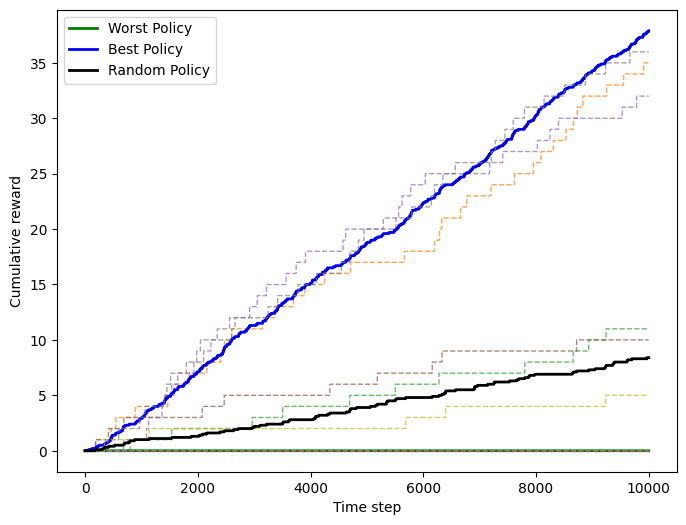

In [22]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()
    
    #policies initialization
    worst_policy = WorstPolicy()
    best_policy = BestPolicy()

    # number of the trail
    trial_num = 10   
    # length of each trail
    trial_length = int(1e4)

    # store all three policies resulsts
    all_rewards = []

    for policy_type in range(3):
         # save the rewards for plot
        rewards_list = []

    
        # run experiment
        for e in tqdm(range(trial_num), desc="Run trial",position=0):
            
            # reset for every trail
            reward_per_trial = []
            reward_counter = 0
        
            # reset the environment 
            state, reward = env.reset()
            
            # run each trial
            for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):
                
                
                # CODE HERE: please implement a policy that is worse than the random policy.
                # It should takes in the current state and output an action
                action = None

                if policy_type == 0: # Get worst policy
                    action = worst_policy.get_action(state)
                elif policy_type == 1: # Get best policy
                    action = best_policy.get_action(state)
                else: # Get random policy
                    action = random.choice(list(env.action_space.keys()))
                        
                # CODE HERE: please implement the code to get the next state and reward
                next_state, reward = env.step(state, action)
                
                
                """DO NOT CHANGE BELOW"""
                # save the reward
                reward_counter += reward
                reward_per_trial.append(reward_counter)
                
                # reset
                if reward == 1:
                    state, reward = env.reset()
                else:
                    state = next_state

            # save the rewards
            rewards_list.append(reward_per_trial)
        
        all_rewards.append(rewards_list)
# PLOT THE RESULTS
plot_three_policies(all_rewards)